<a href="https://colab.research.google.com/github/monesha-goutham/object_detectors/blob/master/YOLOv3_custom_obj_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a YOLOv3 Object Detector with Darknet in the Cloud! (GPU ENABLED)



## Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository



In [3]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13652, done.
remote: Total 13652 (delta 0), reused 0 (delta 0), pack-reused 13652
Receiving objects: 100% (13652/13652), 12.24 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (9312/9312), done.


In [4]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [5]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [6]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

## Download pretrained YOLOv3 weights

YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [0]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-09 08:46:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  78.1KB/s    in 45m 38s 

2020-06-09 09:32:06 (88.5 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
# define helper functions 

# for displaying predictions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

## Run Detections with Darknet and YOLOv3
Darknet is now built and ready to run detections using YOLOv3 in the cloud! The classes the pretrained YOLOv3 can detect can be found in the link [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'



In [0]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

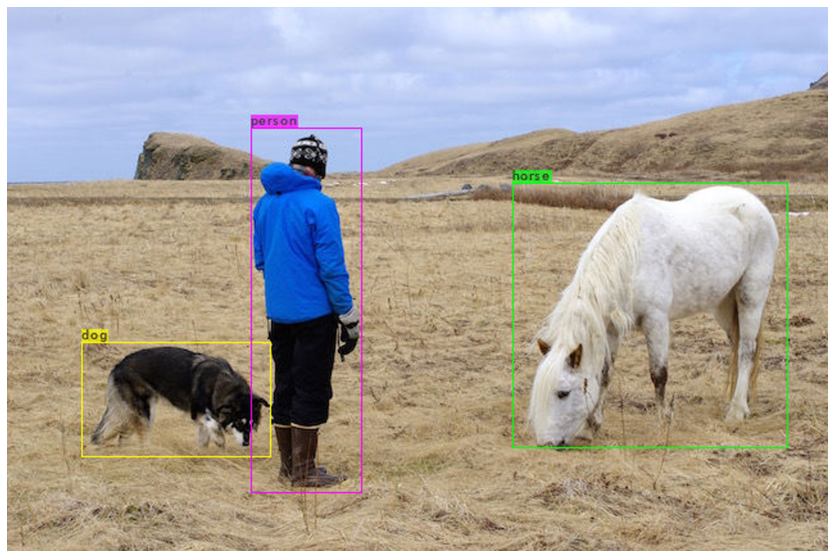

In [0]:
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

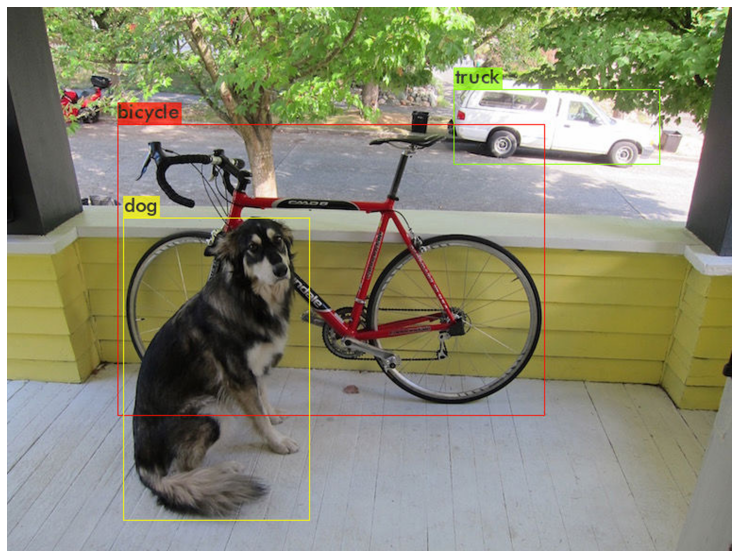

In [0]:
# another detection:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

## Uploading Local or Google Drive Files to Use
To run predictions on user images, than within just the images in darknet/data/images.


In [0]:
# upload an image to root directory (I uploaded an image called street.jpg, you can upload anything)
%cd ..
upload()

/content


Saving bottle.jpg to bottle (2).jpg
saved file bottle.jpg


/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x

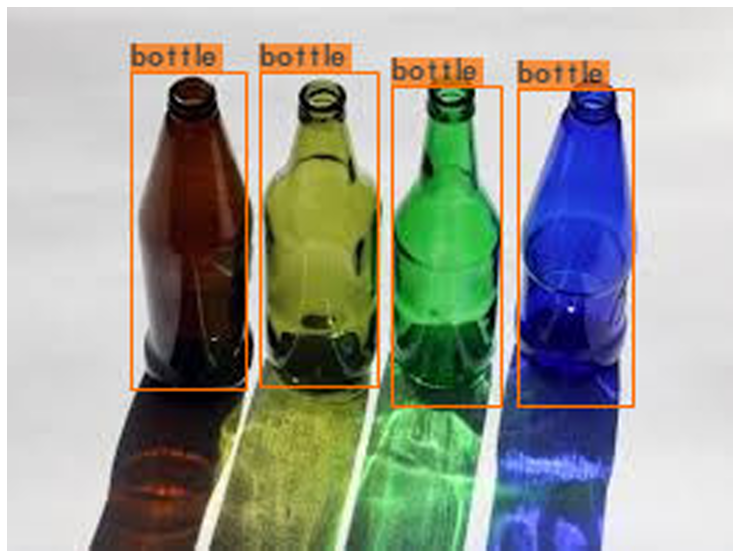

In [0]:
# making sure we are in the darknet folder to run preditions
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../bottle.jpg
imShow('predictions.jpg')

In [14]:
# connecting the drive for future use
# note :  predictions can also be run on images in your drive

from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [16]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive': File exists
/mydrive


### Download Files to Local Machine or Google Drive from Cloud VM
You can also easily download images from your cloud VM to save to your local machine or Google Drive. mainly for saving predicted images. 

#### Method 1: Local Machine

You can do it easily by using our helper function 'download()' or by right clicking the image in the File Explorer on the left side of the notebook and hitting **Download**.
. 

#### Method 2: Google Drive
A simple copy command can copy over any file to your Google Drive as it is already mounted.

```
!cp <file to download> <destination to save file>
```

In [0]:
# LOCAL MACHINE DOWNLOAD

download('predictions.jpg')

In [0]:
# GOOGLE DRIVE DOWNLOAD
# saving it as detection1.jpg
!cp predictions.jpg /mydrive/images/detection1.jpg

## Training a Custom YOLOv3 Object Detector!


In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional)



###**Step 1: Gathering and Labeling a Custom Dataset**

This can be done in two ways. Through using Google open images dataset or creating your own dataset and using an annotation tool to manually draw labels. **I've used the first way**    

*my custom object is a coffee cup*

### **Step 2: Moving Your Custom Dataset Into Your Cloud VM**
moving the dataset into this cloud VM for training by uploading to the dataset as a zip file to gdrive. And, unzipping from here.



In [18]:
# zip file dir (I created a yolov3 folder where I will get my required files from)
!ls /content/drive/My\ Drive/yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_custom.cfg


In [0]:
# copy the .zip file into the root directory of cloud VM 
!cp /content/drive/My\ Drive/yolov3/obj.zip ../

In [23]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/0000615b5a80f660.jpg  
  inflating: data/obj/0000615b5a80f660.txt  
  inflating: data/obj/0000b86e2fd18333.jpg  
  inflating: data/obj/0000b86e2fd18333.txt  
  inflating: data/obj/000e6b1696f62692.jpg  
  inflating: data/obj/000e6b1696f62692.txt  
  inflating: data/obj/0017eb0c38ce3b3b.jpg  
  inflating: data/obj/0017eb0c38ce3b3b.txt  
  inflating: data/obj/0057bb698a9c4508.jpg  
  inflating: data/obj/0057bb698a9c4508.txt  
  inflating: data/obj/007b628d75c12302.jpg  
  inflating: data/obj/007b628d75c12302.txt  
  inflating: data/obj/0082580be212f473.jpg  
  inflating: data/obj/0082580be212f473.txt  
  inflating: data/obj/008ae74fb4201708.jpg  
  inflating: data/obj/008ae74fb4201708.txt  
  inflating: data/obj/009bf5ad19cd8f72.jpg  
  inflating: data/obj/009bf5ad19cd8f72.txt  
  inflating: data/obj/00ac99461029a26f.jpg  
  inflating: data/obj/00ac99461029a26f.txt  
  inflating: data/obj/00c44ee7874867fa.jpg  
  inflating: data/obj/00c44ee78748

## Configuring Files for Training
This step involves properly configuring the custom .cfg file, obj.data, obj.names and train.txt file.


In [0]:
# download cfg to google drive and change its name (so as to not overwrite)
!cp darknet/cfg/yolov3.cfg /content/drive/My\ Drive/yolov3/yolov3_custom.cfg

edit the .cfg to fit your needs based on the object to be detected. edited by opening it up in a code or text editor.

In [0]:
# upload the custom .cfg back to cloud VM from Google Drive
# %cd content
!cp /content/drive/My\ Drive/yolov3/yolov3_custom.cfg ./cfg


* **obj.names** contain the names of the classes in each row
* **obj.data** is a data file that contains the dir of the custom dataset and train.txt file

In [0]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/drive/My\ Drive/yolov3/obj.names ./data
!cp /content/drive/My\ Drive/yolov3/obj.data  ./data



The last file needed for training the custom detector is the train.txt file which hold the relative paths to all the training images.

The script  generates train.txt does the job of generating train.txt's paths.



In [0]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /content/drive/My\ Drive/yolov3/generate_train.py ./


run the python script to do all the work


In [0]:
!python generate_train.py

In [33]:
# verify train.txt can be seen in the darknet/data folder
# it will contain one line for each training image paths
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


##Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps the custom object detector to be way more accurate and not have to train as long. (found via additional source)

In [0]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-06-09 11:19:02--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   161KB/s    in 21m 47s 

2020-06-09 11:40:50 (121 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## Train the Custom Object Detector

```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```

In [0]:
# uncomment this code for training from first 
# i've already trained for 900 iterations

#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

A chart of the average loss vs. iterations can be shown after training. For the model to be accurate we would aim for a loss under 2.

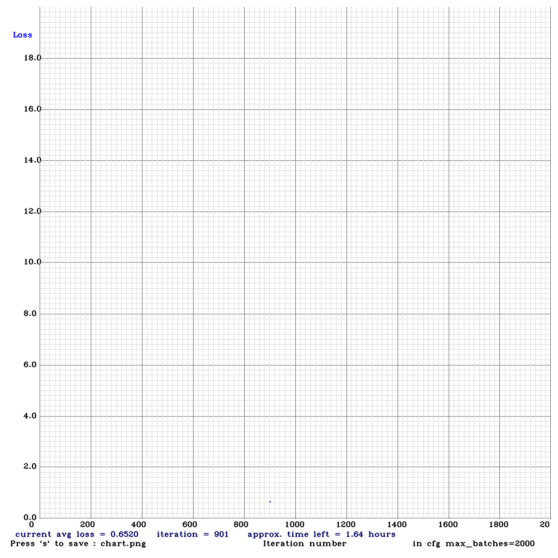

In [49]:
imShow('chart_yolov3_custom.png') # doesnt work ??

In [42]:
# this code for continuing the training from where I left, we get the backup file from the drive

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /content/drive/My\ Drive/yolov3/backup/yolov3_custom_last.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outpu

## Running the Custom Object Detector!!!


In [43]:
# setting the custom config file to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

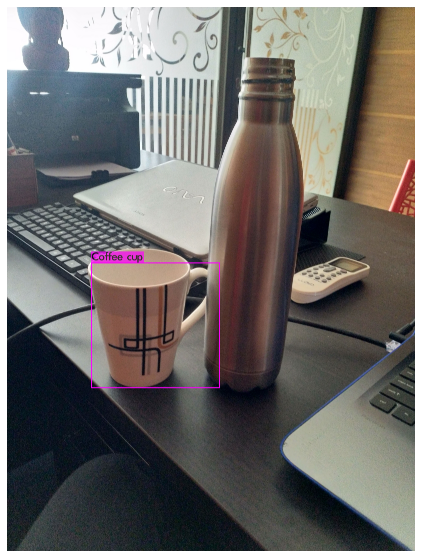

In [48]:
# running detection on a gdrive image (thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/My\ Drive/yolov3/backup/yolov3_custom_last.weights /content/drive/My\ Drive/images/cup_3.jpg -thresh 0.3
imShow('predictions.jpg')
download("predictions.jpg")

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

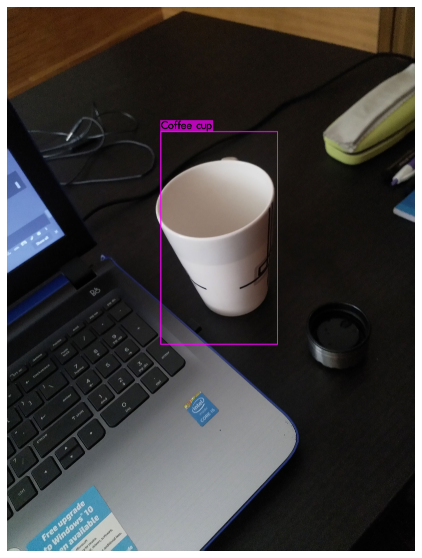

In [50]:
# another prediction
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/My\ Drive/yolov3/backup/yolov3_custom_last.weights /content/drive/My\ Drive/images/cup_2.jpg -thresh 0.3
imShow('predictions.jpg')
download("predictions.jpg")

#***That was my coffee mug !!!***

The coffee mug was predicted with an accuracy of 98%, which is great for training the algo for 900+ epochs. Though, the bounding box was not much correctly positioned, that can be fixed by reducing the error even lower by training the algorithm longer.